In [122]:
import glob, json, os
from PIL import Image
from tqdm import tqdm_notebook
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

img_paths = glob.glob('E:\\八斗学院资料\\第10周：多模态大模型\\ai_challenger_caption_validation_20170910\\ai_challenger_caption_validation_20170910\\caption_validation_images_20170910\\*.jpg')
img_paths.sort()

# img_paths = img_paths[:3000]
# img_paths[:2]

img_paths = img_paths[-10:]
img_paths[:]

['E:\\八斗学院资料\\第10周：多模态大模型\\ai_challenger_caption_validation_20170910\\ai_challenger_caption_validation_20170910\\caption_validation_images_20170910\\ffdb6f38779b30ebcdf26b5c42725234b675f231.jpg',
 'E:\\八斗学院资料\\第10周：多模态大模型\\ai_challenger_caption_validation_20170910\\ai_challenger_caption_validation_20170910\\caption_validation_images_20170910\\ffdf13a41b943ab60d45100a6d70443ad5f9f829.jpg',
 'E:\\八斗学院资料\\第10周：多模态大模型\\ai_challenger_caption_validation_20170910\\ai_challenger_caption_validation_20170910\\caption_validation_images_20170910\\ffe65c3f05a84bf64732562010520df2e3a0fc3c.jpg',
 'E:\\八斗学院资料\\第10周：多模态大模型\\ai_challenger_caption_validation_20170910\\ai_challenger_caption_validation_20170910\\caption_validation_images_20170910\\ffec2d8440a066247662201109ddaf53910fd423.jpg',
 'E:\\八斗学院资料\\第10周：多模态大模型\\ai_challenger_caption_validation_20170910\\ai_challenger_caption_validation_20170910\\caption_validation_images_20170910\\fff0efcf77bb6f7051af131d4a1b873acaf57dc1.jpg',
 'E:\\八斗学院资料\\第10周：多

In [123]:
# validation_annotations = json.load(
#     open('F:\\sucai\\json\\pic_text_last10.json', encoding='utf-8')
# )

validation_annotations = json.load(
    open('E:\\八斗学院资料\\第10周：多模态大模型\\ai_challenger_caption_validation_20170910\\ai_challenger_caption_validation_20170910\\caption_validation_annotations_20170910.json', encoding='utf-8')
)
validation_annotations[:2]

[{'url': 'http://img5.cache.netease.com/photo/0005/2013-09-25/99LA1FC60B6P0005.jpg',
  'image_id': '3cd32bef87ed98572bac868418521852ac3f6a70.jpg',
  'caption': ['一个双臂抬起的运动员跪在绿茵茵的球场上',
   '一个抬着双臂的运动员跪在足球场上',
   '一个双手握拳的男人跪在绿茵茵的足球场上',
   '一个抬起双手的男人跪在碧绿的球场上',
   '一个双手握拳的运动员跪在平坦的运动场上']},
 {'url': 'http://img.hexun.com/2011-06-09/130363655.jpg',
  'image_id': 'fb36d921dcd9184bdd4659864fe7f3cff47accf5.jpg',
  'caption': ['房间里一个右手放在嘴角的女人和一个戴着眼镜的男人在研究仪器',
   '一个披着长发的女人和一个戴着眼镜的男人站在室内的桌子旁',
   '室内有一个戴着眼镜的男人在向一个抬起右手的女人展示东西',
   '房间里有一个左手放在盒子上的男人在给一个右手食指放在嘴边的女人展示东西',
   '一个右手放在嘴边的女人和一个戴着眼镜的男人站在房间里']}]

In [124]:
validation_annotations_dict = {x['image_id']: x['caption'][0] for x in validation_annotations}
# print(f"validation_annotations_dict:{validation_annotations_dict}")

In [125]:
img_paths_basenames = [os.path.basename(x) for x in img_paths]
print(f"img_paths_basenames:{img_paths_basenames}")
img_captions = [validation_annotations_dict[x] for x in img_paths_basenames]
print(f"img_captions:{img_captions}")

img_paths_basenames:['ffdb6f38779b30ebcdf26b5c42725234b675f231.jpg', 'ffdf13a41b943ab60d45100a6d70443ad5f9f829.jpg', 'ffe65c3f05a84bf64732562010520df2e3a0fc3c.jpg', 'ffec2d8440a066247662201109ddaf53910fd423.jpg', 'fff0efcf77bb6f7051af131d4a1b873acaf57dc1.jpg', 'fff31aab7caab8b44a278d38884682f297e31643.jpg', 'fff345ed7e72b95075d9dfa20682f6080d4b49d9.jpg', 'fff483f7125a4607c9499d8ce0470770e8bbc25f.jpg', 'fffb2058cb342b6e84abefb78c137c7f90cf5c23.jpg', 'fffce0267da286a3317317900dbe28f5d9a77610.jpg']
img_captions:['一个人的旁边有三个人在车厢里吃饭', '滑雪场有两个人看着一个人在雪地滑雪', '一群穿着球衣的人在运动场上争抢橄榄球', '室外的土地上有一位靠着树的女士在看书', '草坪上坐着一个长头发的女人', '一个穿着古装服饰的女人落坐在开满白花的路边', '一个穿着白色连衣裙的女人和一个穿着西装的男人站在广告牌前的空地上', '红毯上一群人的旁边有两个老人在切磋', '绿茵茵的球场上有两个穿着不同球衣的男人在争抢足球', '一个左手插在口袋里的女人走在室外的草地旁']


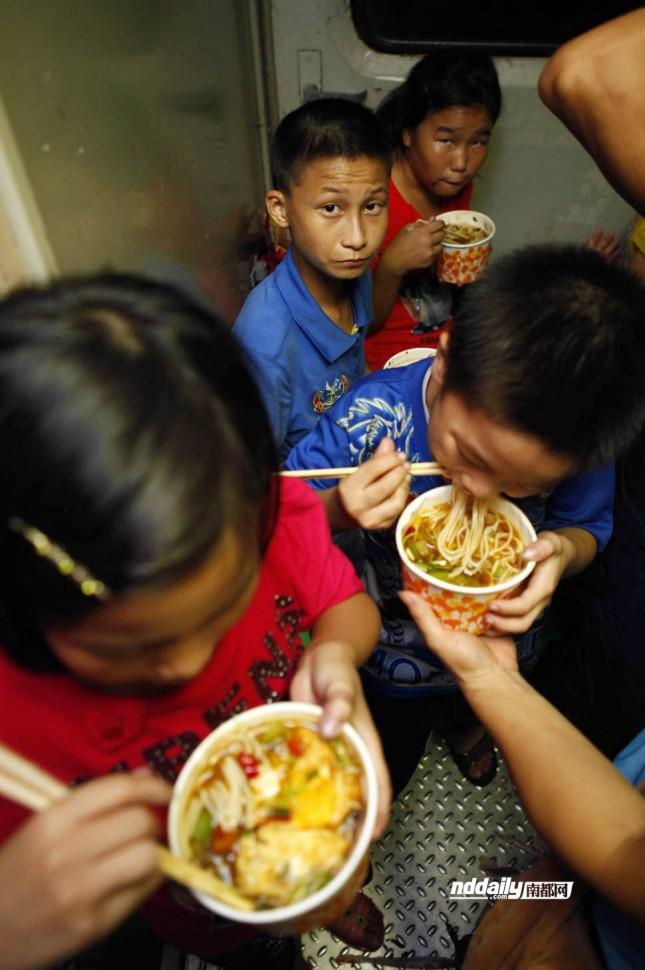

In [126]:
Image.open(img_paths[0])

In [127]:
img_captions[0]

'一个人的旁边有三个人在车厢里吃饭'

# 加载CLIP模型

In [128]:
from PIL import Image
import requests
from transformers import ChineseCLIPProcessor, ChineseCLIPModel
import torch

model = ChineseCLIPModel.from_pretrained("F:\\developer_tools\\models\\AI-ModelScope\\chinese-clip-vit-base-patch16") # 中文clip模型
processor = ChineseCLIPProcessor.from_pretrained("F:\\developer_tools\\models\\AI-ModelScope\\chinese-clip-vit-base-patch16") # 预处理

ValueError: Due to a serious vulnerability issue in `torch.load`, even with `weights_only=True`, we now require users to upgrade torch to at least v2.6 in order to use the function. This version restriction does not apply when loading files with safetensors.
See the vulnerability report here https://nvd.nist.gov/vuln/detail/CVE-2025-32434

# 图像编码

In [ ]:
img_image_feat = []

batch_size = 20
for idx in tqdm_notebook(range(len(img_captions) // batch_size + 1)):
    imgs = [ Image.open(path) for path in img_paths[idx*batch_size: (idx+1)*batch_size] ]
    
    if len(imgs) == 0:
        break
    
    inputs = processor(images=imgs, return_tensors="pt")
    with torch.no_grad():
        image_features = model.get_image_features(**inputs)
        image_features = image_features.data.numpy()
        img_image_feat.append(image_features)

    break
        
img_image_feat = np.vstack(img_image_feat)
img_image_feat = normalize(img_image_feat)

In [ ]:
img_image_feat.shape # 20张图片 512 维度

# 文本编码

In [ ]:
img_texts_feat = []

batch_size = 20
for idx in tqdm_notebook(range(len(img_captions) // batch_size + 1)):
    texts = [ text for text in img_captions[idx*batch_size: (idx+1)*batch_size] ]

    if len(texts) == 0:
        break
    
    inputs = processor(text=texts, return_tensors="pt", padding=True)

    with torch.no_grad():
        text_features = model.get_text_features(**inputs)
        text_features = text_features.data.numpy()
        img_texts_feat.append(text_features)
    break
        
img_texts_feat = np.vstack(img_texts_feat)
img_texts_feat = normalize(img_texts_feat)

In [ ]:
img_texts_feat.shape

# 尝试1：相似度计算

In [ ]:
query_idx = 250

sim_result = np.dot(img_texts_feat[query_idx], img_image_feat.T) # 矩阵计算
sim_idx = sim_result.argsort()[::-1][1:4]

In [ ]:
print('输入文本: ', img_captions[query_idx])

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(Image.open(img_paths[sim_idx[0]]))
plt.xticks([]); plt.yticks([])

plt.subplot(132)
plt.imshow(Image.open(img_paths[sim_idx[1]]))
plt.xticks([]); plt.yticks([])

plt.subplot(133)
plt.imshow(Image.open(img_paths[sim_idx[2]]))
plt.xticks([]); plt.yticks([])

In [ ]:
query_idx = 250

sim_result = np.dot(img_image_feat[query_idx], img_texts_feat.T)
sim_idx = sim_result.argsort()[::-1][1:4]

In [ ]:
plt.imshow(Image.open(img_paths[query_idx]))

print('文本识别结果: ', [img_captions[x] for x in sim_idx])

# 文本标签编码

In [ ]:
import jieba

In [ ]:
jieba.lcut('今天天气很好，心情也很好。')

In [ ]:
jieba.lcut(img_captions[0])

In [ ]:
img_captions2words = [jieba.lcut(x) for x in img_captions]
img_captions2words = sum(img_captions2words, [])

In [ ]:
img_captions2words[:10]

In [ ]:
img_captions2words = [x for x in img_captions2words if len(x) > 1]
img_captions2words = list(set(img_captions2words))

In [ ]:
img_captions2words[:10]

In [ ]:
img_texts_feat = []

batch_size = 20
for idx in tqdm_notebook(range(len(img_captions2words) // batch_size + 1)):
    texts = [ text for text in img_captions2words[idx*batch_size: (idx+1)*batch_size] ]

    if len(texts) == 0:
        break
    
    inputs = processor(text=texts, return_tensors="pt", padding=True)

    with torch.no_grad():
        text_features = model.get_text_features(**inputs)
        text_features = text_features.data.numpy()
        img_texts_feat.append(text_features)
        
img_texts_feat = np.vstack(img_texts_feat)
img_texts_feat = normalize(img_texts_feat)

# 尝试2：标签相似度计算

In [ ]:
query_idx = 120

sim_result = np.dot(img_image_feat[query_idx], img_texts_feat.T)
sim_idx = sim_result.argsort()[::-1][1:7]

In [ ]:
plt.imshow(Image.open(img_paths[query_idx]))

print('文本识别结果: ', [img_captions2words[x] for x in sim_idx])